# New Section

In [1]:
from tensorflow.keras.layers import Conv2D,Flatten,Dense,MaxPool2D,BatchNormalization,GlobalAveragePooling2D
from tensorflow import keras
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
img_h, img_w = (224,224)
batch_size = 32

train_data_dir = r"/content/drive/MyDrive/processed_data/train"
valid_data_dir = r"/content/drive/MyDrive/processed_data/val"
test_data_dir = r"/content/drive/MyDrive/processed_data/test"

In [10]:
train_datagen = ImageDataGenerator(preprocessing_function = preprocess_input,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   validation_split=0.4)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size = (img_h, img_w),
    batch_size = batch_size,
    class_mode='categorical',
    subset='training'
    )

valid_generator = train_datagen.flow_from_directory(
    valid_data_dir,
    target_size = (img_h, img_w),
    batch_size = batch_size,
    class_mode='categorical',
    subset='validation'
    )

Found 1985 images belonging to 90 classes.
Found 360 images belonging to 90 classes.


In [ ]:
test_generator = train_datagen.flow_from_directory(
    test_data_dir,
    target_size = (img_h, img_w),
    batch_size = 1,
    class_mode='categorical',
    subset='validation'
    )

In [ ]:
base_model = ResNet50(include_top = False,weights='imagenet')

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024,activation='relu')(x)

predictions = Dense(train_generator.num_classes,activation='softmax')(x)
model = Model(inputs = base_model.input, outputs = predictions)

for layer in base_model.layers:
    layer.trainable = False

model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

model.fit(train_generator, epochs=10)

94781440/94765736 [==============================] - 1s 0us/step
Epoch 1/10
63/63 [==============================] - 740s 12s/step - loss: 2.2313 - accuracy: 0.5028
Epoch 2/10
63/63 [==============================] - 361s 6s/step - loss: 0.4172 - accuracy: 0.8811
Epoch 3/10
63/63 [==============================] - 371s 6s/step - loss: 0.3574 - accuracy: 0.9214
Epoch 4/10
63/63 [==============================] - 371s 6s/step - loss: 0.2729 - accuracy: 0.9315
Epoch 5/10
63/63 [==============================] - 371s 6s/step - loss: 0.1471 - accuracy: 0.9602
Epoch 6/10
63/63 [==============================] - 373s 6s/step - loss: 0.0743 - accuracy: 0.9788
Epoch 7/10
63/63 [==============================] - 374s 6s/step - loss: 0.0416 - accuracy: 0.9914
Epoch 8/10
63/63 [==============================] - 374s 6s/step - loss: 0.0236 - accuracy: 0.9950
Epoch 9/10
63/63 [==============================] - 372s 6s/step - loss: 0.0213 - accuracy: 0.9945
Epoch 10/10
63/63 [========================

In [ ]:
model.save('/content/drive/MyDrive')

In [3]:
class_name = [ 'antelope','badger','bat','bear','bee','beetle','bison',
'boar','butterfly','cat','caterpillar','chimpanzee','cockroach','cow','coyote','crab',
'crow','deer','dog','dolphin','donkey','dragonfly','duck','eagle','elephant','flamingo','fly','fox','goat','goldfish','goose',
'gorilla','grasshopper','hamster','hare','hedgehog','hippopotamus','hornbill','horse','hummingbird',
'hyena','jellyfish','kangaroo','koala','ladybugs','leopard','lion','lizard','lobster',
'mosquito','moth','mouse','octopus','okapi','orangutan','otter','owl','ox','oyster','panda','parrot','pelecaniformes','penguin',
'pig','pigeon','porcupine','possum','raccoon','rat','reindeer','rhinoceros','sandpiper',
'seahorse','seal','shark','sheep','snake','sparrow','squid','squirrel','starfish',
'swan','tiger','turkey','turtle','whale','wolf','wombat','woodpecker','zebra']

In [ ]:
test_loss , test_acc = model.evaluate(test_generator,verbose = 2)
print('\n Accuracy ', test_acc)

360/360 - 129s - loss: 0.7478 - accuracy: 0.8139 - 129s/epoch - 358ms/step

 Accuracy  0.8138889074325562


In [ ]:
pred = model.predict(image)
print(pred)

In [4]:
new_model = keras.models.load_model('/content/drive/MyDrive/ResNet50_animal.h5')

In [ ]:
test_loss , test_acc = new_model.evaluate(test_generator,verbose =2)

Predicting tha animal


In [5]:
import cv2

In [14]:
image = cv2.imread('/content/drive/MyDrive/processed_data/antelope.jpg')
im = image

In [15]:
image_resized = cv2.resize(image,(img_h,img_w))
image = np.expand_dims(image_resized,axis=0)
print(image.shape)

(1, 224, 224, 3)


In [16]:
pred = new_model.predict(image)
print(pred)

1/1 [==============================] - 0s 223ms/step
[[9.97623265e-01 1.69689651e-09 7.91793582e-08 2.15187850e-11
  1.09698717e-09 1.50637518e-07 6.17126839e-09 2.29490809e-08
  3.50349325e-07 6.90542549e-07 1.04751109e-06 3.50829907e-08
  1.70280290e-10 9.73234251e-07 2.15828413e-06 2.17494378e-08
  1.10302603e-08 1.38725701e-03 4.92069739e-06 2.27448371e-08
  3.88036278e-05 7.34457073e-09 8.61125591e-06 1.37156363e-07
  2.13692832e-08 3.91720164e-07 5.96969030e-10 1.13505694e-08
  6.53744617e-04 4.25469651e-08 2.72832549e-05 1.56575433e-10
  2.38157668e-07 2.86499642e-08 1.67473866e-06 4.01592217e-08
  8.64063168e-08 4.88815743e-08 2.01393323e-05 1.15878201e-07
  1.45045718e-07 3.00872594e-09 2.42209489e-06 1.20150012e-09
  1.21858250e-07 6.46939524e-09 1.12713884e-07 7.17206422e-06
  1.78406701e-09 4.74769279e-10 1.85100726e-06 2.55290300e-09
  6.13692350e-07 1.68452418e-04 1.05513031e-07 5.42314908e-11
  1.44277362e-06 1.68242022e-05 2.76912093e-09 3.50547436e-09
  4.63922333e-07 

antelope


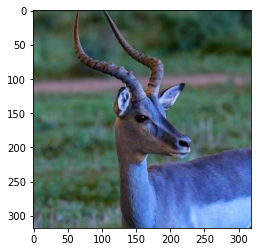

In [17]:
output_class = class_name[np.argmax(pred)]
plt.imshow(im)
print(output_class)